In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from sklearn.model_selection import GridSearchCV

# DATASET

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Training Data

In [4]:
train.shape

(891, 12)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
col = ['PassengerId','Name','Ticket','Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']
train = train[col]               # so that 1st 3 elemnts would represent non convertable categorical data

In [8]:
train.describe(include="all")

,PassengerId,Name,Ticket,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891,891,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,204,889
unique,NaN,891,681,NaN,NaN,2,NaN,NaN,NaN,NaN,147,3
top,NaN,"Mellinger, Miss. Madeleine Violet",CA. 2343,NaN,NaN,male,NaN,NaN,NaN,NaN,C23 C25 C27,S
freq,NaN,1,7,NaN,NaN,577,NaN,NaN,NaN,NaN,4,644
mean,446.000000,NaN,NaN,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN
std,257.353842,NaN,NaN,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN
min,1.000000,NaN,NaN,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,223.500000,NaN,NaN,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN
50%,446.000000,NaN,NaN,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,668.500000,NaN,NaN,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Ticket       891 non-null    object 
 3   Survived     891 non-null    int64  
 4   Pclass       891 non-null    int64  
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train.isnull().sum()
#Age and Cabin has a lot of missing values .Also 2 in Embarked

PassengerId      0
Name             0
Ticket           0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Test DATA

In [11]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
test = test[['PassengerId','Name','Ticket','Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']]
 # so that 1st 3 elemnts would represent nonconvertable categorical data

In [13]:
test.info()
test.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Name         418 non-null    object 
 2   Ticket       418 non-null    object 
 3   Pclass       418 non-null    int64  
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Name,Ticket,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,418.000000,418,418,418.000000,418,332.000000,418.000000,418.000000,417.000000,91,418
unique,NaN,418,363,NaN,2,NaN,NaN,NaN,NaN,76,3
top,NaN,"Ryan, Mr. Edward",PC 17608,NaN,male,NaN,NaN,NaN,NaN,B57 B59 B63 B66,S
freq,NaN,1,5,NaN,266,NaN,NaN,NaN,NaN,3,270
mean,1100.500000,NaN,NaN,2.265550,NaN,30.272590,0.447368,0.392344,35.627188,NaN,NaN
std,120.810458,NaN,NaN,0.841838,NaN,14.181209,0.896760,0.981429,55.907576,NaN,NaN
min,892.000000,NaN,NaN,1.000000,NaN,0.170000,0.000000,0.000000,0.000000,NaN,NaN
25%,996.250000,NaN,NaN,1.000000,NaN,21.000000,0.000000,0.000000,7.895800,NaN,NaN
50%,1100.500000,NaN,NaN,3.000000,NaN,27.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,1204.750000,NaN,NaN,3.000000,NaN,39.000000,1.000000,0.000000,31.500000,NaN,NaN


In [14]:
test.isnull().sum()
#Age & Cabin . only 1 in Fare

PassengerId      0
Name             0
Ticket           0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Preprocessing

In [15]:
#removing unwanted features
train = train.drop(['PassengerId','Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [16]:
train.head()

,Name,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,"Braund, Mr. Owen Harris",0,3,male,22.0,1,0,7.2500,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,female,38.0,1,0,71.2833,C85,C
2,"Heikkinen, Miss. Laina",1,3,female,26.0,0,0,7.9250,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,female,35.0,1,0,53.1000,C123,S
4,"Allen, Mr. William Henry",0,3,male,35.0,0,0,8.0500,NaN,S


In [17]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())  

In [18]:
#Since "S" is the most frequently appearing value in Embarked.We will fill the 2 missing places with S

train['Embarked'] = train['Embarked'].fillna('S')

# Relation between each feature and target feature


c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

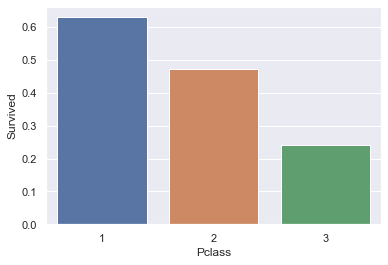

In [19]:
# passengerClass

sns.barplot('Pclass','Survived',data = train,ci= None)


In [20]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

people who travelled by 1st class had higher survival chances

In [24]:
# SEX
train.groupby("Sex").Survived.value_counts()

#females had higher survival chances

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


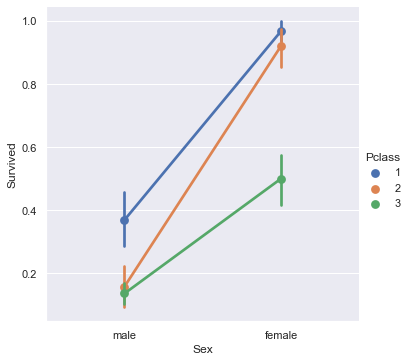

In [25]:
sns.factorplot('Sex','Survived', hue = 'Pclass', data = train)

Females overall had more chances of survival than males.
Females who had less chances of survival were from 3rd class.
Males from 1st class had more chances of survival than other 2.

In [26]:
# Embarked

tab = pd.crosstab(train['Embarked'],train['Survived'])
print(tab)

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  219


People from port S had higher death ratio than other ports

In [27]:
tab1 = pd.crosstab(train['Embarked'],train['Sex'])
print(tab1)

Sex       female  male
Embarked              
C             73    95
Q             36    41
S            205   441


In [35]:
train.groupby('Embarked')['Sex'].value_counts

<bound method SeriesGroupBy.value_counts of <pandas.core.groupby.generic.SeriesGroupBy object at 0x000001295098EAF0>>

In [36]:
train.groupby('Embarked')['Sex'].value_counts(normalize = True )

Embarked  Sex   
C         male      0.565476
          female    0.434524
Q         male      0.532468
          female    0.467532
S         male      0.682663
          female    0.317337
Name: Sex, dtype: float64

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


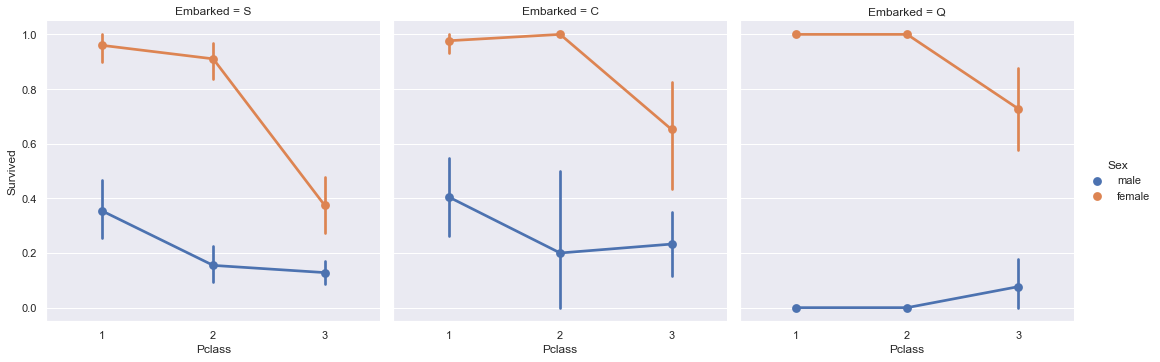

In [37]:

sns.factorplot('Pclass','Survived', hue = 'Sex', col = 'Embarked', data = train)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

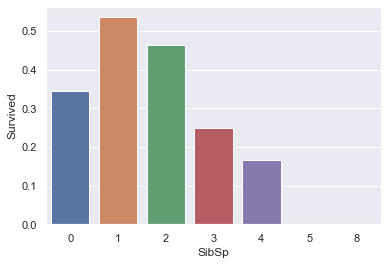

In [38]:
#Siblings&Spouse
sns.barplot('SibSp', 'Survived', ci = None, data = train)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

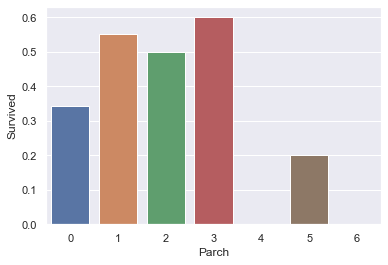

In [39]:
#Parent & Child
sns.barplot('Parch','Survived',data = train, ci = None)

In [41]:
#AGE

# Total data
total_survived = train[train['Survived']==1]
total_died = train[train['Survived']==0] 

# Male data
male_survived = train[(train['Sex']=='male') & (train['Survived']==1)]
male_died = train[(train['Sex']=='male') & (train['Survived']==0)]

# Female data
female_survived = train[(train['Sex']=='female') & (train['Survived']==1)]
female_died = train[(train['Sex']=='female') & (train['Survived']==0)]

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Female age'>

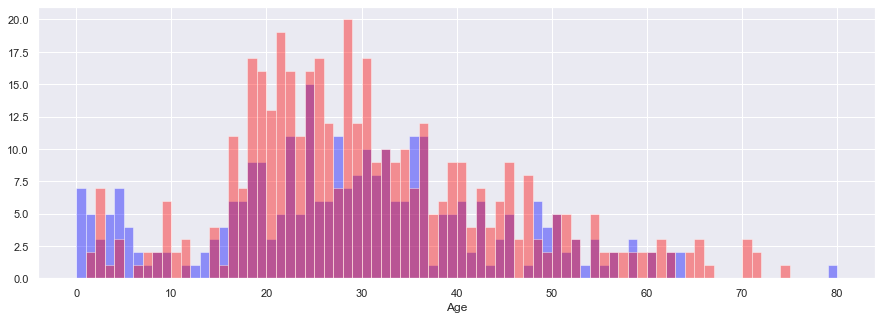

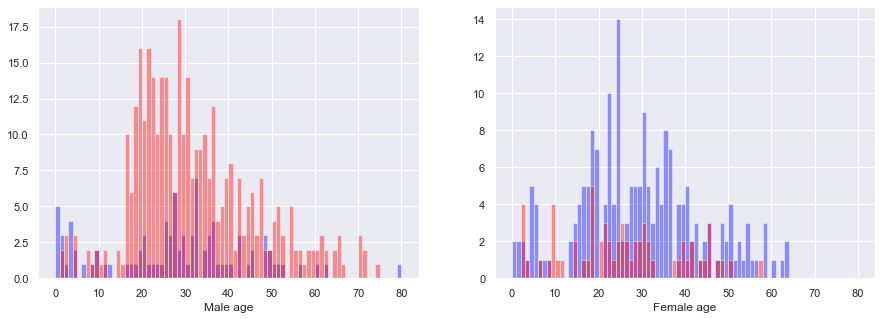

In [42]:
# Total distplot
plt.figure(figsize = [15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna(), bins = range(0,81,1), color = 'blue', kde = None)
sns.distplot(total_died['Age'].dropna(), bins = range(0,81,1), color = 'red', kde = None, axlabel = 'Age')

# Male distplot
plt.figure(figsize = [15,5])
plt.subplot(121)
sns.distplot(male_survived['Age'].dropna(), bins = range(0,81,1), color = 'blue', kde = None)
sns.distplot(male_died['Age'].dropna(),bins = range(0,81,1), color = 'red', kde = None, axlabel = 'Male age')

# Female distplot
plt.subplot(122)
sns.distplot(female_survived['Age'].dropna(), bins = range(0,81,1), color = 'blue', kde = None)
sns.distplot(female_died['Age'].dropna(),bins = range(0,81,1), color = 'red', kde = None, axlabel = 'Female age')


Total data
Children till the age 16 had more chances of survival.

Adults from age 18-65 had less chances of survival.

Male data
Children till the age 16 had more chances of survival.

Most of the people who died were from age group 18-75.

Female data

Mostly everyone survived but people from the age of 2-12, 15-34 and 38-52 had relatively less chances of survival than others.

<AxesSubplot:>

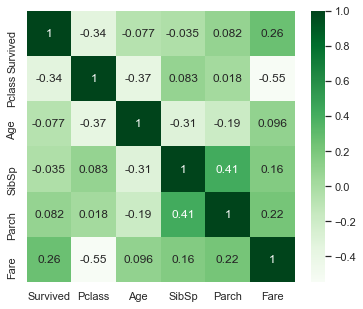

In [43]:
#Finding correlation

plt.figure(figsize=[6,5])
sns.heatmap(train.corr(), annot = True, cmap='Greens')


SibSp and Parch almost provides same info which is family size and they are positively correlated so we wil merge them

In [44]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [46]:
comb = [train,test]

In [47]:
for a in comb:
    a['Deck'] = a.Cabin.str.extract('([a-zA-Z]+)')

In [48]:
a.Deck.unique()

array([nan, 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [50]:
for a in comb:
    a['Deck'] = a['Deck'].map({'B':1, 'E':2, 'A':3, 'C':4, 'D':5, 'F':6, 'G':7})
    a['Deck'] = a['Deck'].fillna(0)
    a['Deck'] = a['Deck'].astype(int)

In [51]:
for a in comb:
    a['Titles'] = a.Name.str.extract(' ([A-Za-z]+)\.')

In [52]:
pd.crosstab(train['Titles'],train['Sex'])

Sex,female,male
Titles,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [53]:

train.Titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [54]:
for a in comb:
    a['Titles'] = a['Titles'].replace(['Don', 'Rev', 'Dr','Major', 'Lady', 'Sir', 'Col', 'Capt',\
                                       'Countess','Jonkheer'], 'Others')
    a['Titles'] = a['Titles'].replace('Ms','Mrs')
    a['Titles'] = a['Titles'].replace(['Mlle','Mme'],'Miss')

In [55]:
train['Titles'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others'], dtype=object)

In [56]:
for a in comb:
    a['Titles'] = a['Titles'].map({'Mr':1, 'Mrs':2, 'Miss':3, 'Master':4, 'Others':5})
    a['Titles'] = a['Titles'].fillna(0)
    a['Titles'] = a['Titles'].astype(int)

In [57]:
train.head()

,Name,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,Titles
0,"Braund, Mr. Owen Harris",0,3,male,22.0,1,0,7.2500,NaN,S,0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,female,38.0,1,0,71.2833,C85,C,0,2
2,"Heikkinen, Miss. Laina",1,3,female,26.0,0,0,7.9250,NaN,S,0,3
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,female,35.0,1,0,53.1000,C123,S,0,2
4,"Allen, Mr. William Henry",0,3,male,35.0,0,0,8.0500,NaN,S,0,1


In [58]:
for a in comb:
    a['Sex'] = a['Sex'].map({'male':1,'female':0})
    a['Sex'] = a['Sex'].astype(int)

In [59]:
for a in comb:
    a['Embarked'] = a['Embarked'].map({'S':1,'C':2, 'Q':3})
    a['Embarked'] = a['Embarked'].astype(int)

In [60]:
train.Age.isnull().sum()

177

In [61]:

for a in comb:    
    mean = a['Age'].mean()
    sd = a['Age'].std()
    size = a.Age.isnull().sum()

    fill = np.random.randint(mean-sd, mean+sd, size = size)
    a['Age'][np.isnan(a['Age'])] = fill

<ipython-input-61-e000a43cca9f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Age'][np.isnan(a['Age'])] = fill


In [62]:
for a in comb:
    a['Age grp'] = pd.cut(a['Age'],5)
    
print(pd.cut(train['Age'],5).unique())

[(16.336, 32.252], (32.252, 48.168], (48.168, 64.084], (0.34, 16.336], (64.084, 80.0]]
Categories (5, interval[float64]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]


In [63]:
for a in comb:
    a.loc[a['Age']< 16.336, 'Age'] = 0
    a.loc[(a['Age']>= 16.336) & (a['Age']<32.252), 'Age'] = 1
    a.loc[(a['Age']>=32.252) & (a['Age']<48.168), 'Age'] = 2
    a.loc[(a['Age']>=48.168) & (a['Age']<64.084), 'Age'] = 3
    a.loc[a['Age']>64.084, 'Age'] = 4
    a['Age'] = a['Age'].astype(int)

In [64]:
train.head()

,Name,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,Titles,Age grp
0,"Braund, Mr. Owen Harris",0,3,1,1,1,0,7.2500,NaN,1,0,1,"(16.336, 32.252]"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,2,1,0,71.2833,C85,2,0,2,"(32.252, 48.168]"
2,"Heikkinen, Miss. Laina",1,3,0,1,0,0,7.9250,NaN,1,0,3,"(16.336, 32.252]"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,2,1,0,53.1000,C123,1,0,2,"(32.252, 48.168]"
4,"Allen, Mr. William Henry",0,3,1,2,0,0,8.0500,NaN,1,0,1,"(32.252, 48.168]"


# Fare

In [66]:
for a in comb:
    a['Fare rng'] = pd.qcut(a['Fare'],4)

print(pd.qcut(a['Fare'],4).unique())

[(-0.001, 7.896], (7.896, 14.454], (14.454, 31.472], (31.472, 512.329]]
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.472] < (31.472, 512.329]]


In [67]:
for a in comb:
    a.loc[a['Fare']<7.896, 'Fare'] = 0
    a.loc[(a['Fare']>=7.896) & (a['Fare']<14.454), 'Fare'] = 1
    a.loc[(a['Fare']>=14.454) & (a['Fare']<31.472), 'Fare'] = 2
    a.loc[a['Fare']>=31.472, 'Fare'] = 3
    a['Fare'] = a['Fare'].astype(int)

# sibSp and Parch

In [68]:
for a in comb:
    a['Fam'] = a['SibSp'] + a['Parch'] + 1
    a.loc[a['Fam']==1, 'Alone'] = 1
    a.loc[a['Fam']>1, 'Alone'] = 0
    a['Alone'] = a['Alone'].astype(int)
#1 represent the person with whom the prents/children or siblings/spouse are travelling.    

In [69]:
train.head()

,Name,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,Titles,Age grp,Fare rng,Fam,Alone
0,"Braund, Mr. Owen Harris",0,3,1,1,1,0,0,NaN,1,0,1,"(16.336, 32.252]","(-0.001, 7.91]",2,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,2,1,0,3,C85,2,0,2,"(32.252, 48.168]","(31.0, 512.329]",2,0
2,"Heikkinen, Miss. Laina",1,3,0,1,0,0,1,NaN,1,0,3,"(16.336, 32.252]","(7.91, 14.454]",1,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,2,1,0,3,C123,1,0,2,"(32.252, 48.168]","(31.0, 512.329]",2,0
4,"Allen, Mr. William Henry",0,3,1,2,0,0,1,NaN,1,0,1,"(32.252, 48.168]","(7.91, 14.454]",1,1


In [70]:
drop = ['Name', 'SibSp', 'Parch', 'Cabin', 'Age grp', 'Fare rng', 'Fam']
train = train.drop(drop, axis = 1)
test = test.drop(drop, axis = 1)

In [71]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Titles,Alone
0,0,3,1,1,0,1,0,1,0
1,1,1,0,2,3,2,0,2,0
2,1,3,0,1,1,1,0,3,1
3,1,1,0,2,3,1,0,2,0
4,0,3,1,2,1,1,0,1,1


In [72]:

test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Deck,Titles,Alone
0,892,3,1,2,0,3,0,1,1
1,893,3,0,2,0,1,0,2,0
2,894,2,1,3,1,3,0,1,1
3,895,3,1,1,1,1,0,1,1
4,896,3,0,1,1,1,0,2,0


In [73]:
X_test = test.drop('PassengerId', axis = 1)

In [74]:
x = train.drop('Survived', axis = 1)
y = train['Survived']

# Train Test set split

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# CLASSIFIER

# Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [77]:
reg.score(x_train, y_train)

0.8033707865168539

In [78]:
reg.score(x_test, y_test)

0.7988826815642458

In [79]:
y_log_pred = reg.predict(x_test)

In [81]:
accuracy = reg.score(x_test, y_test)
accuracy

0.7988826815642458

In [82]:
print('Accuracy is '+ str(round(accuracy*100,2))+"%")

Accuracy is 79.89%


In [92]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions_log = cross_val_predict(reg, x_train, y_train, cv=3)
cm = confusion_matrix(y_train, predictions_log)
print(cm)

[[364  73]
 [ 77 198]]


# Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier()

In [84]:
dec.fit(x_train,y_train)

DecisionTreeClassifier()

In [85]:
dec.score(x_train, y_train)

0.8792134831460674

In [86]:
dec.score(x_test, y_test)

0.8324022346368715

In [87]:

acc_dec = dec.score(x_test, y_test)
print('Accuracy: ' + str(round(acc_dec*100,2))+"%")

Accuracy: 83.24%


In [93]:
predictions_dec = cross_val_predict(dec, x_train, y_train, cv=3)
cm_dec = confusion_matrix(y_train, predictions_dec)

print(cm_dec)

[[379  58]
 [ 82 193]]


# Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier( n_estimators=100)
rnd.fit(x_train, y_train)

RandomForestClassifier()

In [89]:
rnd.score(x_train, y_train)

0.8792134831460674

In [90]:
rnd.score(x_test, y_test)

0.8100558659217877

In [91]:
acc_rnd = rnd.score(x_test, y_test)
print("Accuracy: " + str(round(acc_rnd*100,2))+"%")

Accuracy: 81.01%


In [94]:
predictions_rnd = cross_val_predict(rnd, x_train, y_train, cv=3)
cm_rnd = confusion_matrix(y_train, predictions_rnd)

print(cm_rnd)

[[375  62]
 [ 70 205]]
